In [2]:
%matplotlib inline
from skimage import io
from scipy.ndimage.morphology import binary_fill_holes as imfill
from matplotlib import pyplot as plt
from scipy.io import loadmat
import numpy as np
import matplotlib
from PIL import Image
import random
import cv2
import os

In [3]:
test = io.imread('./dataset/chess_boards/110013255681815.jpg')

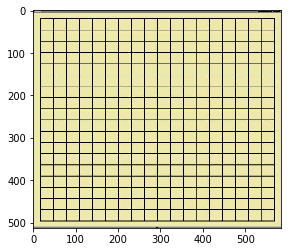

In [4]:
plt.imshow(test)

In [5]:
test.shape

(513, 584, 3)

In [7]:
img = io.imread('./dataset/chess_boards/110013255681815.jpg')

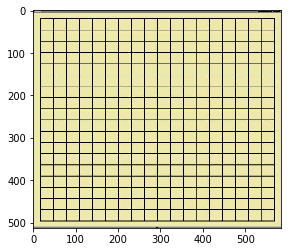

In [8]:
plt.imshow(img)
plt.show()

In [30]:
path = './dataset/manuscript_papers/'
files = os.listdir(path)

In [31]:
len(files)

253

In [32]:
def rotate(image, angle, center=None, scale=1.0):
    (h, w) = image.shape[:2]
 
    if center is None:
        center = (w / 2, h / 2)
 
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated_img = cv2.warpAffine(image, M, (w, h))
 
    return rotated_img

In [33]:
count = 0
for index,filename in enumerate(files):
    img = io.imread(path + filename)
    crop_h = 200
    crop_w = 200
        
    yp = img.shape[0] - crop_h
    xp = img.shape[1] - crop_w
    
    if yp <= 0 or xp <= 0:
        crop_img = img
    else:
        # four random crop
        for i in range(4):

            y = random.randint(0,yp)
            x = random.randint(0,xp)
            crop_img = img[y:y+crop_h, x:x+crop_w]
            io.imsave('./dataset/crop_manuscript_papers/{0}.png'.format(count), crop_img)
#             cv2.imwrite('./dataset/crop_green_bean_cakes/{0}.png'.format(count), crop_img)
            print(count)
            count += 1

        # random rotation and crop
        for i in range(4):
            img = rotate(img, random.randint(10,50))
            y = random.randint(0,yp)
            x = random.randint(0,xp)
            crop_img = img[y:y+crop_h, x:x+crop_w]
            io.imsave('./dataset/crop_manuscript_papers/{0}.png'.format(count), crop_img)
#             cv2.imwrite('./dataset/crop_green_bean_cakes/{0}.png'.format(count), crop_img)
            print(count)
            count += 1
            

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


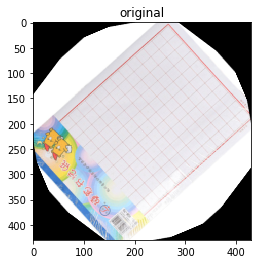

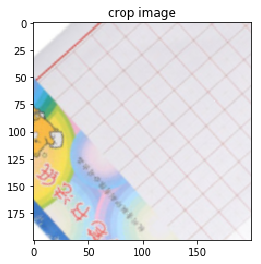

In [34]:
plt.imshow(img)
plt.title('original')
plt.show()
plt.imshow(crop_img)
plt.title('crop image')
plt.show()

In [11]:
rotate_img = rotate(img, 55)

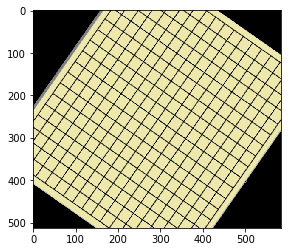

In [12]:
plt.imshow(rotate_img)
plt.show()

## Read images from cropped images

In [69]:
chess_path = './dataset/crop_chessboards/'
cake_path = './dataset/crop_green_bean_cakes/'
paper_path = './dataset/crop_manuscript_papers/'

In [161]:
chess_files = os.listdir(chess_path)
cake_files = os.listdir(cake_path)
paper_files = os.listdir(paper_path)

In [215]:
# create labels and add to a list
chess_data = []
cake_data = []
paper_data = []

for file in chess_files:
    chess_arr = io.imread(chess_path+file)
    if len(chess_arr.shape) == 3:
        label = np.array([1,0,0])
        chess_data.append(np.array([chess_arr, label]))

for file in cake_files:
    cake_arr = io.imread(cake_path+file)
    if len(cake_arr.shape) == 3:
        label = np.array([0,1,0])
        cake_data.append(np.array([cake_arr, label]))

for file in paper_files:
    paper_arr = io.imread(paper_path+file)
    if len(paper_arr.shape) == 3:
        label = np.array([0,0,1])
        paper_data.append(np.array([paper_arr, label]))


In [216]:
# change to numpy array
chess_data = np.array(chess_data)
cake_data = np.array(cake_data)
paper_data = np.array(paper_data)

In [217]:
# randomly shuffle data
np.random.shuffle(chess_data)
np.random.shuffle(cake_data)
np.random.shuffle(paper_data)

In [218]:
training_ratio = 0.75

In [219]:
# get training data
training_chess = chess_data[0: int(len(chess_data)*training_ratio)]
training_cake = cake_data[0: int(len(cake_data)*training_ratio)]
training_paper = paper_data[0: int(len(paper_data)*training_ratio)]

In [220]:
# get tast data
test_chess = chess_data[int(len(chess_data)*training_ratio):]
test_cake = cake_data[int(len(cake_data)*training_ratio):]
test_paper = paper_data[int(len(paper_data)*training_ratio):]

In [221]:
# concat all training data
training_data = np.concatenate([training_chess, training_cake, training_paper],axis=0)
np.random.shuffle(training_data)

In [222]:
# concat all test data
test_data = np.concatenate([test_chess, test_cake, test_paper],axis=0)

In [223]:
training_data.shape

(174, 2)

In [224]:
test_data.shape

(58, 2)

In [233]:
# create data handler
class DataHandler():
    def __init__(self, training_data, test_data):
        self.tr_data = training_data
        self.ts_data = test_data
        self.pointer = 0
        self.epoch = 0
        self.data_index = np.arange(len(self.tr_data))
        
    def next_batch(self,num):
        if self.pointer + num <= len(self.tr_data):
            index = self.data_index[self.pointer:self.pointer+num]
            self.pointer += num
        else:
            new_pointer = self.pointer + num - len(self.tr_data)
            index = np.concatenate((self.data_index[self.pointer:], self.data_index[:new_pointer]),axis=0)
            self.shuffle_data()
            self.pointer = new_pointer
        
        batch_samples = np.array([ i[0] for i in self.tr_data[index]])
        batch_labels = np.array([ i[1] for i in self.tr_data[index]])
        
        return batch_samples, batch_labels
     
    def shuffle_data(self):
        np.random.shuffle(self.data_index)
        self.epoch += 1
        #print('epoch: ', self.epoch)
        
    def reset(self):
        self.pointer = 0
        self.data_index = np.arange(len(self.tr_data))
        self.epoch = 0

In [234]:
dataset = DataHandler(training_data, test_data)
    

In [227]:
dataset.tr_data[33][0].shape

(200, 200, 3)

In [248]:
batch_x, batch_y = dataset.next_batch(50)
print('batch x shape: ', batch_x.shape)
print('batch y shape: ', batch_y.shape)

batch x shape:  (50, 200, 200, 3)
batch y shape:  (50, 3)
